In [22]:
import pandas as pd
import re

# df = pd.read_json('yc_data.json')
df = pd.read_json('https://raw.githubusercontent.com/akshaybhalotia/yc_company_scraper/refs/heads/main/data/combined_companies_data.json') 
# deduplicate by id slug name desc 
df = df.drop_duplicates(subset=['id', 'slug', 'name', 'long_description'], keep='first')
df["one_liner"] = df.one_liner.fillna("").astype(str)
df["long_description"] = df.long_description.fillna("").astype(str)
df["desc"] = df.one_liner + " " + df.long_description 
df["short"] = df.name + " \n " + df.one_liner

original_length = len(df) 
df = df[df['desc'].notna() & (df['desc'].str.len() >= 5)] 
rows_dropped = original_length - len(df)

print(f"Dropped {rows_dropped} rows where 'desc' was NaN or had length less than 5.")
print(f"New DataFrame length: {len(df)}")


# Compile patterns for efficiency (do this outside the functions)
AI_REGEX = re.compile(r'\bai\b|artificial intelligence|machine learning|llm|nlp|ai-power')
AGENT_REGEX = re.compile(r'\bagents?\b')
HEALTH_REGEX = re.compile(r'''
    \b(health(care)?|medical|medicine|med(i)?tech|pharma(ceuticals?)?|biotech|
    wellness|fitness|nutrition|therapy|mental[\s-]health|telemedicine|
    diagnosis|treatment|patient|doctor|hospital|clinic|drug|vaccine|
    health[\s-]tech|life[\s-]sciences?|genomics?|bioinformatics)\b
''', re.VERBOSE | re.IGNORECASE)

def mentions_ai(text):
    if not isinstance(text, str):
        return False
    return bool(AI_REGEX.search(text.lower()))

def mentions_ai_agents(text):
    if not isinstance(text, str):
        return False
    text = text.lower()
    return bool(AI_REGEX.search(text) and AGENT_REGEX.search(text))

df["mentions_ai_agents"] = df.desc.apply(mentions_ai_agents)
df["mentions_ai"] = df.desc.apply(mentions_ai)
df["mentions_health"] = df.desc.apply(lambda x: bool(HEALTH_REGEX.search(x.lower())))
df.head(3)
fields_to_save = ['id', 'name', 'slug', 'desc', 'small_logo_thumb_url', 'website',"short", 'launched_at',   'tags', 'mentions_ai_agents', 'mentions_ai','industries','status' , 'batch', 'mentions_health']
# df.to_json('yc_data.json', orient='records' )
df[fields_to_save].to_json('yc_data.json', orient='records' )
df[fields_to_save][:2].to_json('yc_data_short.json', orient='records' )

Dropped 58 rows where 'desc' was NaN or had length less than 5.
New DataFrame length: 5501


In [14]:
print(df.columns)
df.head(3)

Index(['id', 'name', 'slug', 'former_names', 'small_logo_thumb_url', 'website',
       'all_locations', 'long_description', 'one_liner', 'team_size',
       'industry', 'subindustry', 'launched_at', 'tags', 'tags_highlighted',
       'top_company', 'isHiring', 'nonprofit', 'batch', 'status', 'industries',
       'regions', 'stage', 'app_video_public', 'demo_day_video_public',
       'app_answers', 'question_answers', 'objectID', '_highlightResult',
       'desc', 'short', 'mentions_ai_agents', 'mentions_ai',
       'mentions_health'],
      dtype='object')


,id,name,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,...,demo_day_video_public,app_answers,question_answers,objectID,_highlightResult,desc,short,mentions_ai_agents,mentions_ai,mentions_health
0,282,Poll Everywhere,poll-everywhere,[],https://bookface-images.s3.amazonaws.com/small...,https://www.polleverywhere.com,"San Francisco, CA, USA; Remote",Poll Everywhere turns any presentation into a ...,Interactive meetings and presentations,70.0,...,False,NaN,False,282,"{'name': {'value': 'Poll Everywhere', 'matchLe...",Interactive meetings and presentations Poll Ev...,Poll Everywhere \n Interactive meetings and pr...,False,False,False
1,291,BackType,backtype,[Backtype],https://bookface-images.s3.amazonaws.com/small...,http://backtype.com,"San Francisco, CA, USA",,BackType was an analytics company acquired by ...,0.0,...,False,NaN,False,291,"{'name': {'value': 'BackType', 'matchLevel': '...",BackType was an analytics company acquired by ...,BackType \n BackType was an analytics company ...,False,False,False
2,289,JustSpotted,justspotted,[],/company/thumb/missing.png,http://justspotted.com,"Copenhagen, Denmark",The artist-formerly-known-as Scoopler is a rea...,Acquired by Google in 2011,2.0,...,False,NaN,False,289,"{'name': {'value': 'JustSpotted', 'matchLevel'...",Acquired by Google in 2011 The artist-formerly...,JustSpotted \n Acquired by Google in 2011,False,False,False


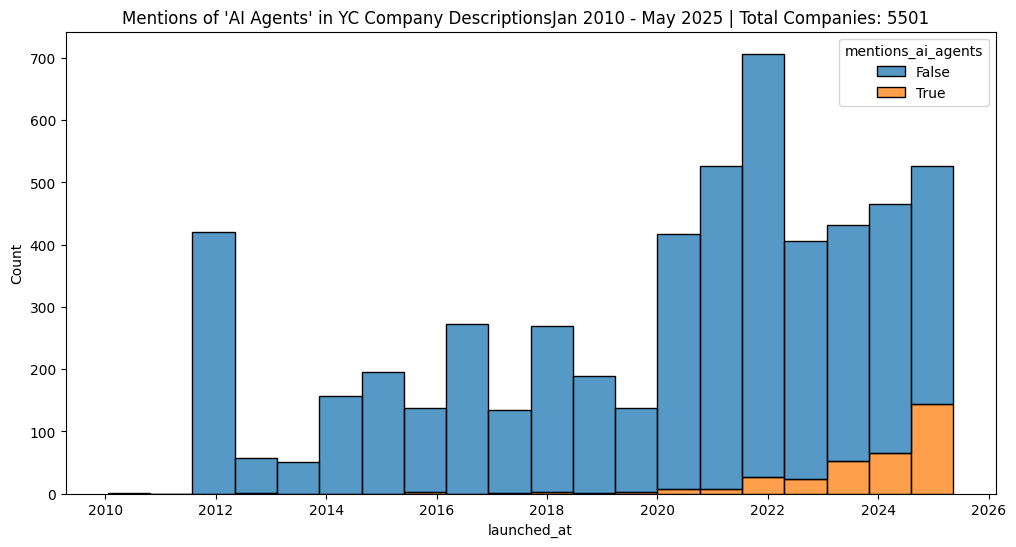

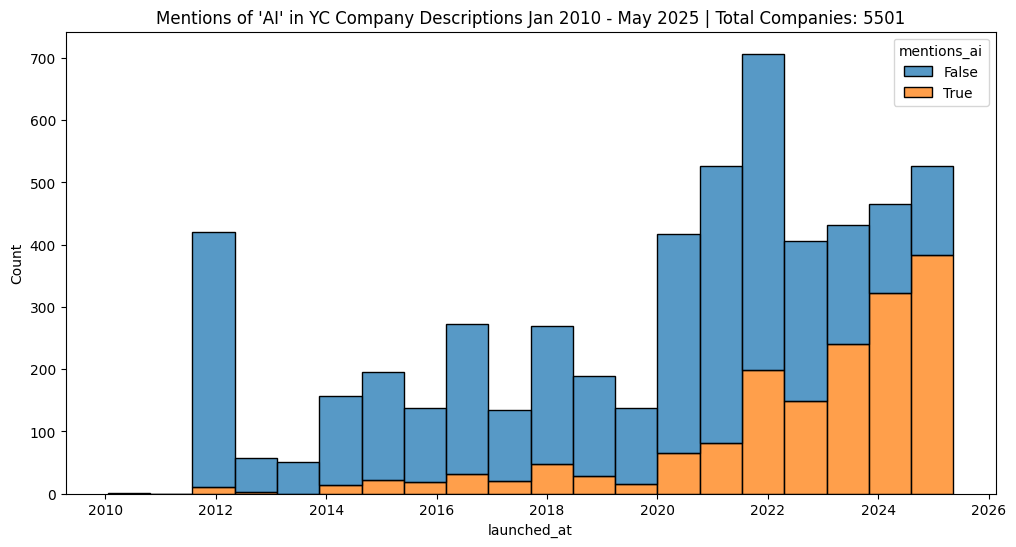

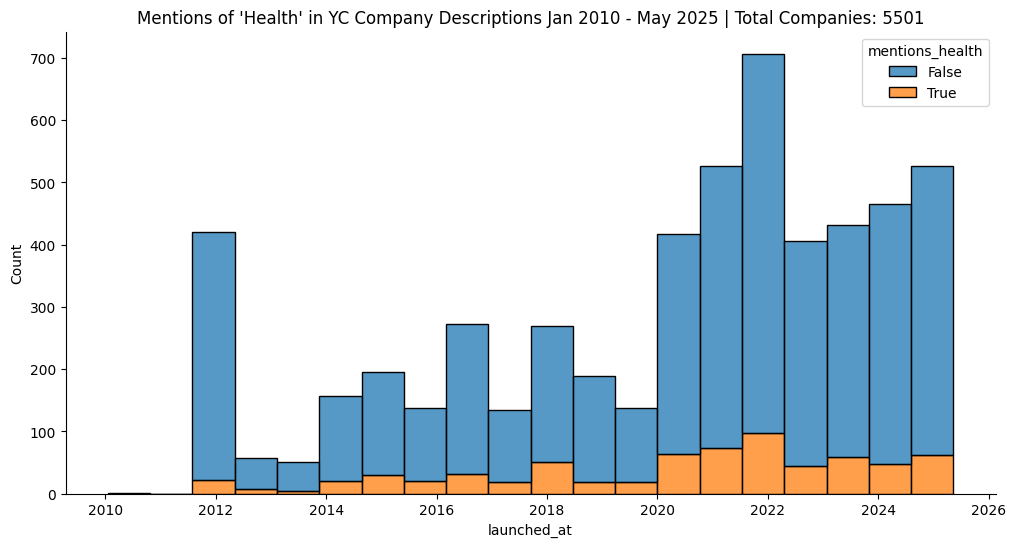

In [8]:
# sns plot of companies by launched_at colored by whether they mention AI

import seaborn as sns
import matplotlib.pyplot as plt

date_range = f"{df.launched_at.min().strftime('%b %Y')} - {df.launched_at.max().strftime('%b %Y')}"

plt.figure(figsize=(12, 6))
sns.histplot(df, x="launched_at", hue="mentions_ai_agents", multiple="stack", bins=20);
plt.title(f"Mentions of 'AI Agents' in YC Company Descriptions{date_range} | Total Companies: {len(df)}  ")


plt.figure(figsize=(12, 6))
sns.histplot(df, x="launched_at", hue="mentions_ai", multiple="stack", bins=20); 
plt.title(f"Mentions of 'AI' in YC Company Descriptions {date_range} | Total Companies: {len(df)}")


plt.figure(figsize=(12, 6))
sns.histplot(df, x="launched_at", hue="mentions_health", multiple="stack", bins=20);
plt.title(f"Mentions of 'Health' in YC Company Descriptions {date_range} | Total Companies: {len(df)}")

# remove plot frame 
sns.despine()

In [21]:
df.loc[:2].to_json(orient='records')

'[{"id":282,"name":"Poll Everywhere","slug":"poll-everywhere","former_names":[],"small_logo_thumb_url":"https:\\/\\/bookface-images.s3.amazonaws.com\\/small_logos\\/ecbec2f3750898b4408fbaa96c7249395a7fc445.png","website":"https:\\/\\/www.polleverywhere.com","all_locations":"San Francisco, CA, USA; Remote","long_description":"Poll Everywhere turns any presentation into a two-way conversation - directly in your PowerPoint, Keynote, or Google Slide deck. Participants respond to questions live using mobile phones and the results appear instantly in beautiful, animated displays. Poll Everywhere engages everyone at conferences, town halls, training sessions, marketing events, and everyday meetings. Learn more about how organizations like HP, Volvo, KPMG, and over 75% of the Fortune 500 use Poll Everywhere to get results.","one_liner":"Interactive meetings and presentations","team_size":70.0,"industry":"B2B","subindustry":"B2B -> Analytics","launched_at":1326790942000,"tags":["SaaS"],"tags_hi